<br>

---

<br>

## **2. Logistic Regression**
The main purpose of this section is building a Logistic regression model<br>
for predicting which crowdfunding projects are successfully founded or not.
<br><br>
It includes EDA, Cleaning, Building Model, Explanations, and Model Evaluation.
<br><br><br>

### Preparing

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_ks = pd.read_csv('./ks_projects_201612.csv',encoding='latin_1')
df_ks.head()

C:\Users\he125\AppData\Local\Temp\ipykernel_24916\3515552774.py:7: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ks = pd.read_csv('./ks_projects_201612.csv',encoding='latin_1')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


<br>

### 2-1. EDA & Pre-processing

**Data** : ks-projects-201612 is the data representing '2016 kickstarter Projects'. <br>
It has columns including Id, name, category, main category ...etc.

<br>

#### **(1) Head observations**

In [41]:
df_ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


<br>

#### **(2) Information**
Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16 are useless and need to be removed. <br>
Also, most of variables represented in object type should be converted to proper data types like numeric or categorical.

In [42]:
df_ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16     1 non-null       float64
dtypes: float64

#### **(2+) Processing : Drop useless columns**

In [43]:
df_ks.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'], axis=1, inplace=True)
df_ks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              323750 non-null  int64 
 1   name            323746 non-null  object
 2   category        323745 non-null  object
 3   main_category   323750 non-null  object
 4   currency        323750 non-null  object
 5   deadline        323750 non-null  object
 6   goal            323750 non-null  object
 7   launched        323750 non-null  object
 8   pledged         323750 non-null  object
 9   state           323750 non-null  object
 10  backers         323750 non-null  object
 11  country         323750 non-null  object
 12  usd pledged     319960 non-null  object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


#### **(2++) Processing : Convert data types**

In [51]:
df_ks[['goal ','pledged ','backers ','usd pledged ']] = df_ks[['goal ','pledged ','backers ','usd pledged ']].apply(pd.to_numeric,errors='coerce')

df_ks[['goal ','pledged ','backers ','usd pledged ']]

,goal,pledged,backers,usd pledged
0,1000.0,0.0,0.0,0.0
1,45000.0,220.0,3.0,220.0
2,5000.0,1.0,1.0,1.0
3,19500.0,1283.0,14.0,1283.0
4,50000.0,52375.0,224.0,52375.0
...,...,...,...,...
323745,50000.0,25.0,1.0,25.0
323746,1500.0,155.0,5.0,155.0
323747,15000.0,20.0,1.0,20.0
323748,15000.0,200.0,6.0,200.0


<br>

#### **(3) Checking missing values**

In [36]:
df_ks.isnull().sum()

ID                   0
name                 4
category             5
main_category        0
currency             0
deadline             0
goal                 0
launched             0
pledged              0
state                0
backers              0
country              0
usd pledged       3790
dtype: int64

#### **(3+) Processing : Drop missing values**

In [37]:
df_ks = df_ks.dropna()
df_ks.isnull().sum()

ID                0
name              0
category          0
main_category     0
currency          0
deadline          0
goal              0
launched          0
pledged           0
state             0
backers           0
country           0
usd pledged       0
dtype: int64

<br>

#### **(4) Checking column names**
Id, name, .., usd pledged, all columns have a whitespace, which might bring about some errors.

In [38]:
print(df_ks.columns.values)

['ID ' 'name ' 'category ' 'main_category ' 'currency ' 'deadline '
 'goal ' 'launched ' 'pledged ' 'state ' 'backers ' 'country '
 'usd pledged ']


#### **(4+) Processing : Remove whiteSpaces in colnames**

In [39]:
newColnames = []
for i in range(len(df_ks.columns.values)) :
    newColnames.append(df_ks.columns.values[i][:len(df_ks.columns.values[i])-1])

df_ks.columns = newColnames
df_ks.head()
print(df_ks.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged'],
      dtype='object')


<br>

#### **(4) **

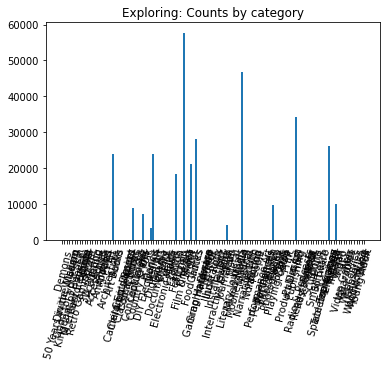

In [11]:
# bar chart
df_ks_categ = df_ks.groupby('main_category ')['main_category '].count()

plt.title('Exploring: Counts by category')
plt.xticks(rotation=75)
plt.bar(df_ks_categ.index,df_ks_categ.values)
plt.show()

In [101]:
# # barchart
# # showing average score by race

# pisa_avgScore_byRace = pisa_train.groupby('raceeth')['readingScore'].mean().sort_values(ascending=True)
# print(pisa_avgScore_byRace)

# plt.figure(figsize=(10,6))
# plt.title('Exploring: Average of reading score by race')
# plt.barh(pisa_avgScore_byRace.index,pisa_avgScore_byRace.values)
# plt.show()

In [102]:
# sns.pairplot(pisa_train)

In [103]:
# sns.displot(data=pisa_train, x='readingScore',kde=True)

In [104]:

# sns.set(rc = {'figure.figsize': (15,10)})
# sns.heatmap(pisa_train.corr())

<br>

### 2-2. Data Processing

In [105]:
# a = pd.array([1,2,3])
# print(a.size)

<br>

### 2-3. Model Building

<br>

### 2-4. Explanations on the model

<br>

### 2-5. Model Evaluation

<br>